In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import boxcox

import re

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Loading Dataset

df = pd.read_csv("/content/laptop_details (1).csv")

In [ ]:
# Printing Top 5 Rows

df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [ ]:
# Printing Last 5 Rows

df.tail()

,Product,Rating,MRP,Feature
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,"₹23,490",Intel Celeron Dual Core Processor4 GB LPDDR4 R...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,"₹1,94,990",AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,"₹1,25,990",Intel Core i7 Processor (12th Gen)16 GB LPDDR5...
719,Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 G...,4.2,"₹50,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [ ]:
# Printing Random 10 Rows

df.sample(10)

,Product,Rating,MRP,Feature
165,ASUS TUF Gaming A17 Ryzen 7 Octa Core AMD R7-4...,4.5,"₹85,990",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAM6...
376,Lenovo IdeaPad 1 Ryzen 3 Dual Core 3250U - (8 ...,4.2,"₹35,590",AMD Ryzen 3 Dual Core Processor8 GB DDR4 RAM64...
458,MSI Katana GF66 Core i7 12th Gen - (8 GB/512 G...,4.1,"₹79,990",Intel Core i7 Processor (12th Gen)8 GB DDR4 RA...
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
81,ASUS ROG Strix G15 Ryzen 7 Octa Core AMD R7-48...,4.6,"₹85,990",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAMW...
407,ASUS ROG Strix G15 Ryzen 7 Octa Core AMD R7-48...,4.6,"₹85,990",AMD Ryzen 7 Octa Core Processor16 GB DDR4 RAMW...
142,DELL Vostro Ryzen 3 Dual Core R3-3250U - (8 GB...,3.8,"₹33,099",Processor: AMD Ryzen 3-3250U (2.60 GHz up to 3...
380,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,"₹73,490",AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...
57,Lenovo IdeaPad 1 Ryzen 5 Quad Core 3500U - (8 ...,4.2,"₹38,705",AMD Ryzen 5 Quad Core Processor8 GB DDR4 RAM64...
543,acer Predator Helios 300 Core i9 11th Gen - (1...,4.4,"₹1,24,990",Intel Core i9 Processor (11th Gen)16 GB DDR4 R...


**Initial Observations**
 - MRP column is a Target variable
 - Feature column is required a lot of Feature Engineering
 - Product column is also required a little bit of Feature Engineering
 - For our requirement Rating column not required

In [ ]:
# Printing Total Number of Rows and Columns

df.shape

(720, 4)

In [ ]:
# Printing Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [ ]:
# Printing Columns Name

df.columns

Index(['Product', 'Rating', 'MRP', 'Feature'], dtype='object')

In [ ]:
# Printing Statistical Information Of Dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,581.0,4.32117,0.282872,3.0,4.2,4.3,4.5,5.0


In [ ]:
# Checking Null Values

df.isnull().sum()

Product      0
Rating     139
MRP          0
Feature      0
dtype: int64

In [ ]:
# Checking Duplicated Values

df.duplicated().sum()

297

**Findings**

- Data have 720 Rows and 4 Columns
- MRP need treatment because it contain strings
- Likewise we dont use Rating Columns so we dont need to take care of that column
- We have limited amount of data so we don't to need drop the data in duplicated values or any others

# Data Preprocessing



**Treating MRP Column**

In [ ]:
# MRP Column

df.MRP.head()

0    ₹36,990
1    ₹39,990
2    ₹32,990
3    ₹49,990
4    ₹49,990
Name: MRP, dtype: object

In [ ]:
# Removing Rupee Symbol

df['MRP'] = df['MRP'].str.replace('₹','')

In [ ]:
# Removing Coma and Convert into Integer

df['MRP'] = df['MRP'].str.replace(',','').astype('float32')

In [ ]:
df.MRP

0       36990.0
1       39990.0
2       32990.0
3       49990.0
4       49990.0
         ...   
715     23490.0
716     73490.0
717    194990.0
718    125990.0
719     50990.0
Name: MRP, Length: 720, dtype: float32

In [ ]:
print("Minimum Value : ", df.MRP.min())
print("Maximum Value : ", df.MRP.max())
print("Mean Value : ",    df.MRP.mean())
print("Median Value : ",  df.MRP.median())

Minimum Value :  14990.0
Maximum Value :  434830.0
Mean Value :  81605.836
Median Value :  59990.0


In [ ]:
print("25% Values : ", df.MRP.quantile(0.25))
print("75% Values : ", df.MRP.quantile(0.75))

25% Values :  38996.75
75% Values :  95240.0


**Findings**

- Minimum Values of MRP Column is 14990
- Maximum Values of MRP Column is 434830
- Mean Values of MRP Column is 81605
- Median Values of MRP Column is 59990
- 25% Values of MRP Column is 38996
- 75% Values of MRP Column is 95240

#### Which means data have to many outlier

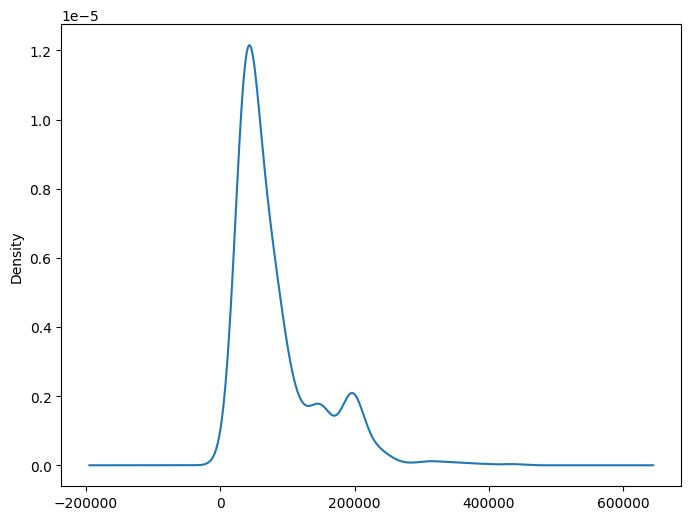

In [ ]:
# Visualizing Density PLot in MRP Column for checking the Distribution

df.MRP.plot(kind='kde', figsize=(8,6))
plt.show()

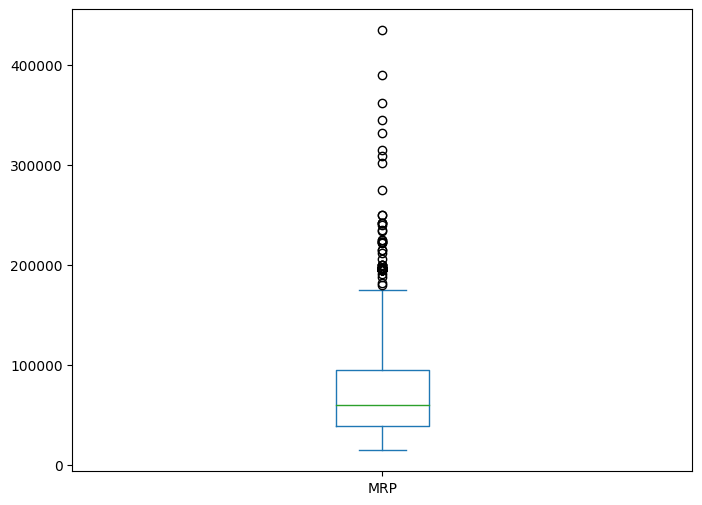

In [ ]:
# Visualizing BoxPLot in MRP Column for checking the Outlier

df.MRP.plot(kind='box', figsize=(8,6))
plt.show()

**Findings**

-  too many Outliers
- Instead of removing values we have to use Data transformation to handle Outliers

### Data transformation

Data transformation is the process of converting data from one format or scale to another to make it suitable for analysis. It can involve changing the distribution of data, scaling or normalizing values, converting categorical data to numerical data, and more.

**Log transformation** converting data to a logarithmic scale to reduce the magnitude of extreme values and make the distribution more symmetric.



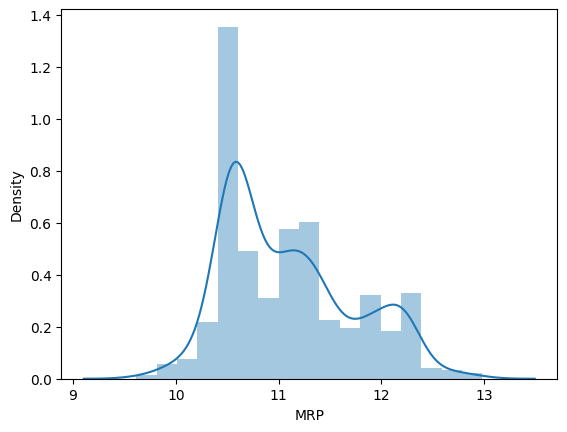

In [ ]:
log = df.MRP.apply(np.log1p)
sns.distplot(log)
plt.show()

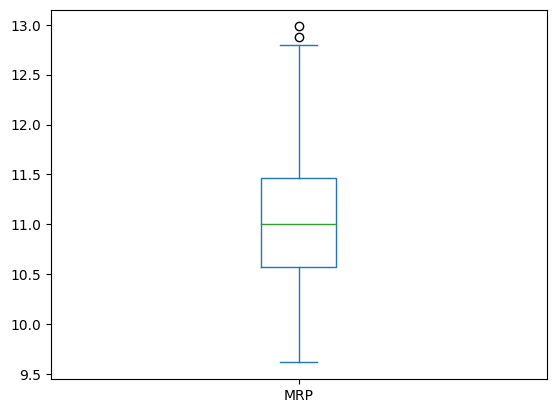

In [ ]:
log.plot(kind='box')
plt.show()

**Reciprocal** transformation involves taking the reciprocal of each value in a dataset to reduce the effect of extreme values and make the distribution of the data more symmetric. It is particularly useful when the data has a positive skew, but has limitations and should be used with caution.

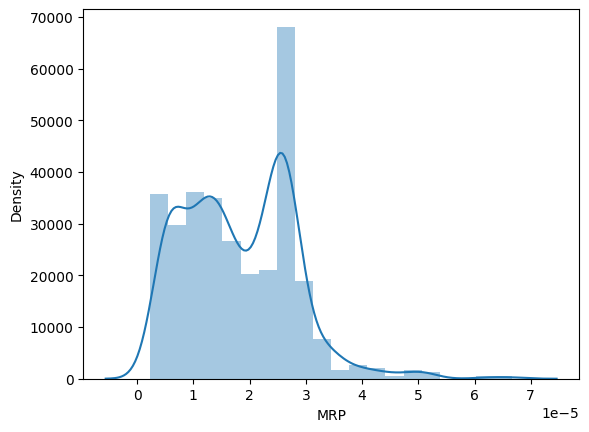

In [ ]:
reci = df.MRP.apply(np.reciprocal)
sns.distplot(reci)
plt.show()

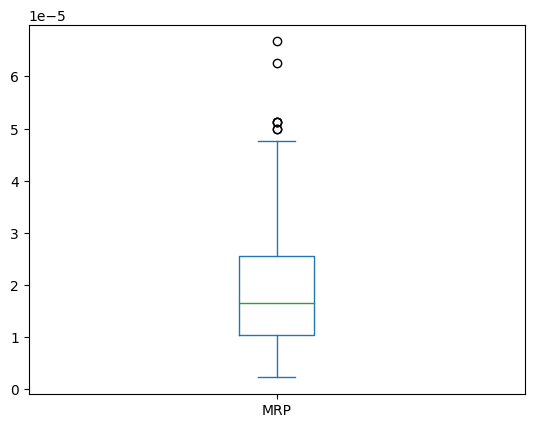

In [ ]:
reci.plot(kind='box')
plt.show()

**Square root transformation** involves taking the square root of each value in a dataset to reduce the effect of extreme values and make the distribution of the data more symmetric. It is often used when the data has a positive skew, but its effectiveness depends on the specific dataset and analysis goals.

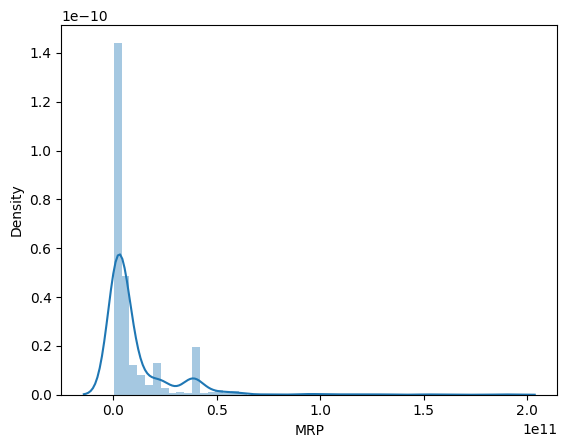

In [ ]:
squ = df.MRP.apply(np.square)
sns.distplot(squ)
plt.show()

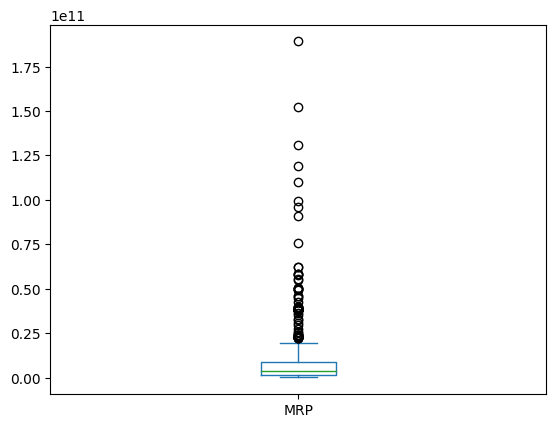

In [ ]:
squ.plot(kind='box')
plt.show()

**Power transformation** - raising data to a power to adjust the distribution and reduce the impact of outliers.

<Axes: ylabel='Density'>

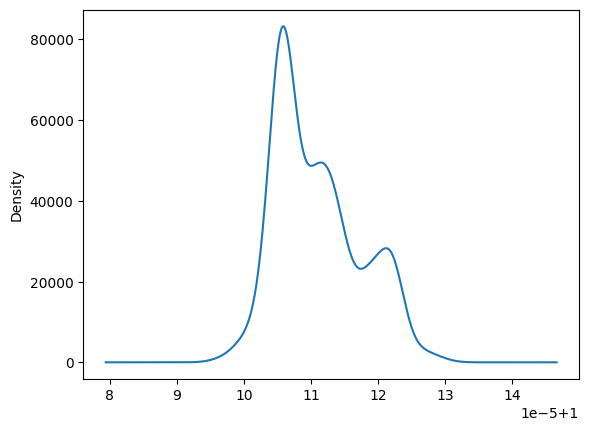

In [ ]:
power = 0.00001

# apply the power transformation
transformed_data = np.power(df.MRP, power)
transformed_data.plot(kind='kde')

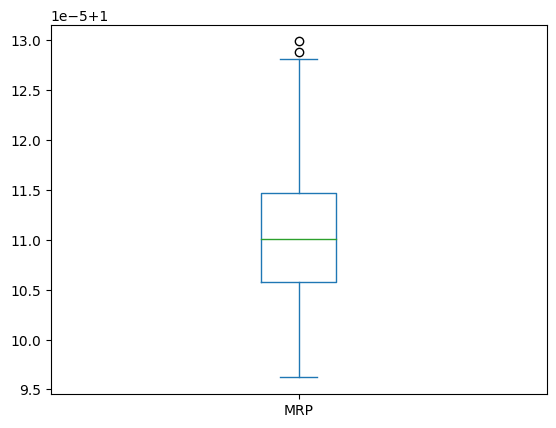

In [ ]:
transformed_data.plot(kind='box')
plt.show()

**Findings**

- After applying few data transformation log and power will perform better
- did some parameter tuning in power transformation to make it better
- Conclusion  choose Log Transformation for my MRP Column

In [ ]:
df['MRP'] = log

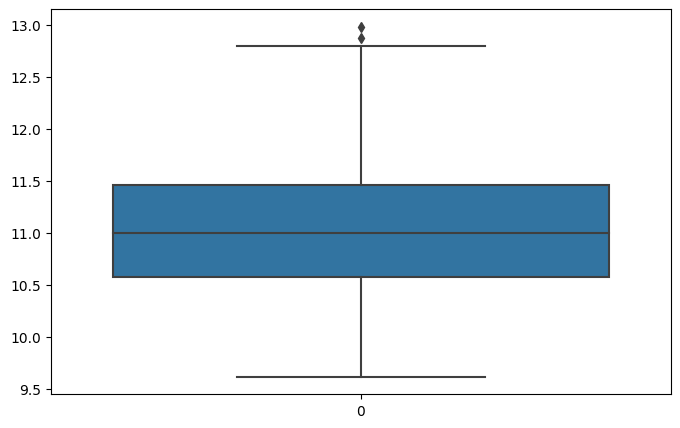

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(df.MRP)
plt.show()

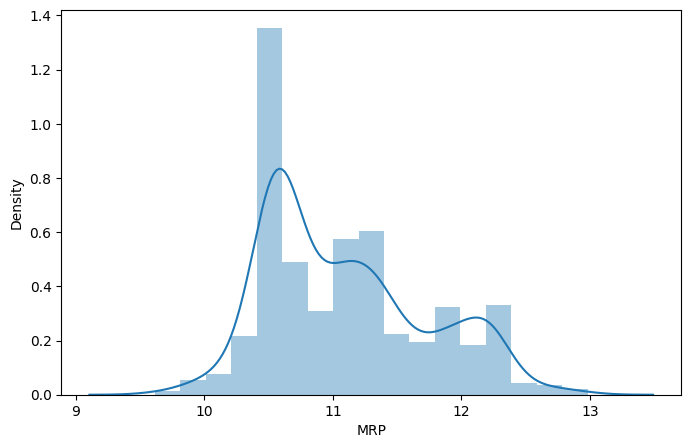

In [ ]:
plt.figure(figsize=(8,5))
sns.distplot(df.MRP)
plt.show()

In [ ]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


**Capping Outlier**

Capping outliers means setting a limit to extreme values in a dataset. It helps to reduce the impact of outliers on the analysis and make the dataset more representative of the general population. However, caution should be exercised as it may mask important information in the data and may not be appropriate in all situations. Various methods are used to cap outliers, depending on the data and objectives of the analysis.

In [ ]:
# Finding the IQR

percentile25 = df.MRP.quantile(0.25)
percentile75 = df.MRP.quantile(0.75)

In [ ]:
percentile25

10.571259021759033

In [ ]:
percentile75

11.464155435562134

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
iqr

0.8928964138031006

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 12.803500056266785
Lower limit 9.231914401054382


In [ ]:
# Finding Outlier

df[df['MRP'] > upper_limit]

,Product,Rating,MRP,Feature
464,MSI Core i9 12th Gen - (32 GB/2 TB SSD/Windows...,NaN,12.873879,Intel Core i9 Processor (12th Gen)32 GB DDR5 R...
625,DELL Allienware Core i9 11th Gen - (32 GB/1 TB...,NaN,12.982713,Intel Core i9 Processor (11th Gen)32 GB DDR4 R...


In [ ]:
df[df['MRP'] < lower_limit]

,Product,Rating,MRP,Feature


In [ ]:
new_df_cap = df.copy()

new_df_cap['MRP'] = np.where(
    new_df_cap['MRP'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['MRP'] < lower_limit,
        lower_limit,
        new_df_cap['MRP']
    )
)

In [ ]:
new_df_cap.shape

(720, 4)

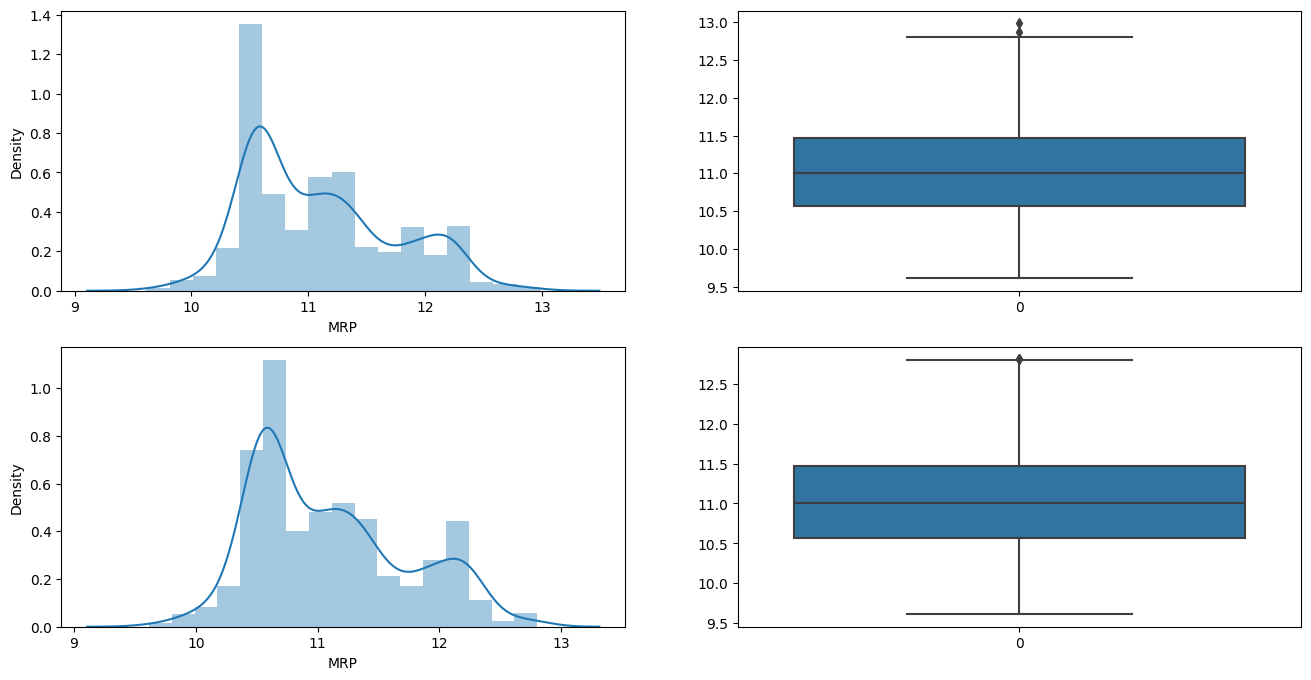

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['MRP'])

plt.subplot(2,2,2)
sns.boxplot(df['MRP'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['MRP'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['MRP'])

plt.show()

<Axes: >

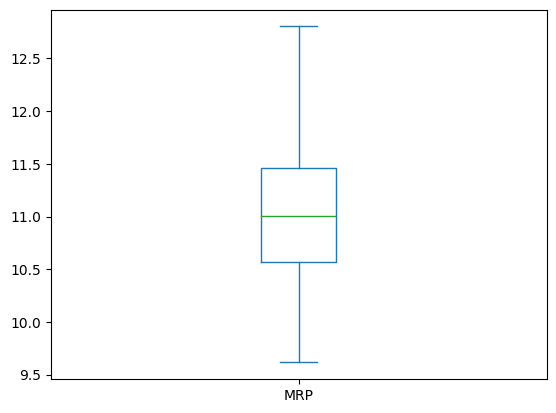

In [ ]:
new_df_cap.MRP.plot(kind='box')

### Trimming

Trimming outliers means removing extreme values from a dataset by setting a threshold value and deleting any values that exceed this limit. It helps to remove the impact of outliers on the analysis and make the dataset more representative of the general population. However, caution should be exercised as it may also mask important information in the data and may not be appropriate in all situations. Various methods are used to trim outliers, depending on the data and objectives of the analysis.

In [ ]:
new_df = df[df['MRP'] < upper_limit]

In [ ]:
new_df.shape

(718, 4)

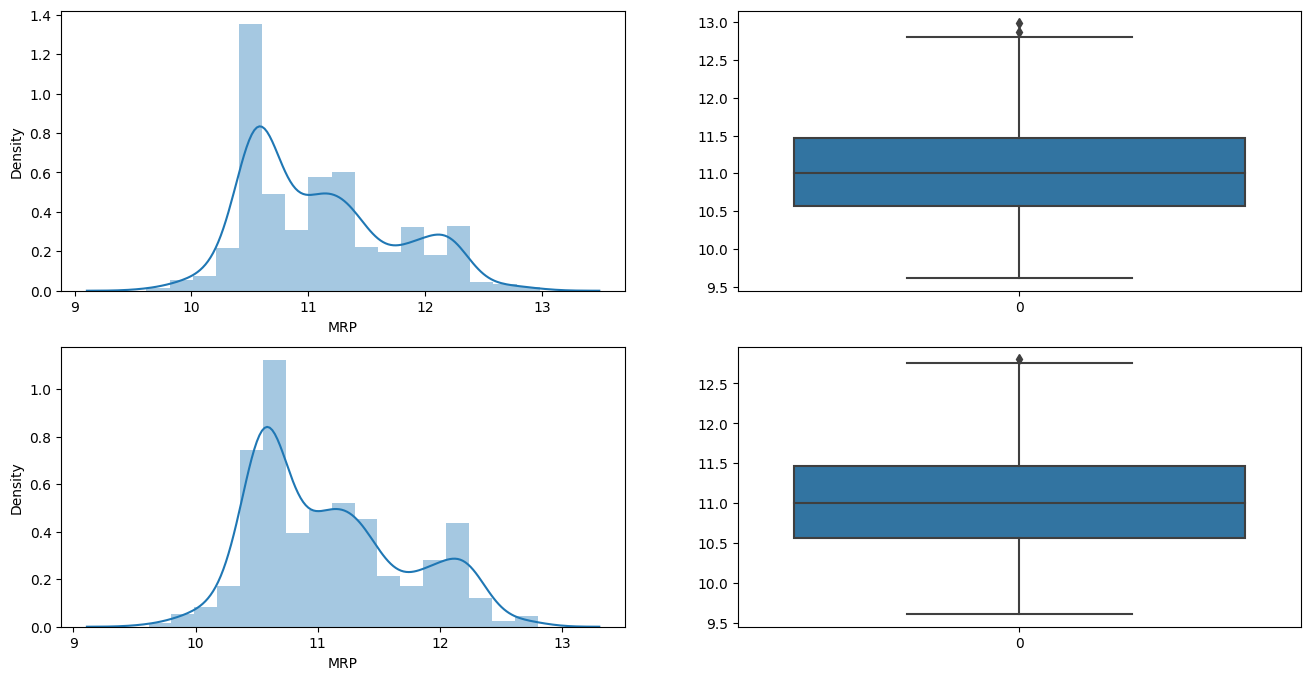

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['MRP'])

plt.subplot(2,2,2)
sns.boxplot(df['MRP'])

plt.subplot(2,2,3)
sns.distplot(new_df['MRP'])

plt.subplot(2,2,4)
sns.boxplot(new_df['MRP'])

plt.show()

**Finding**

Since Trying both Capping and Trimming Technique but didn't effect on distribtion so I decided so use capping instead trimming because of less data.

**Applying Capping**

In [ ]:
df['MRP'] = np.where(
    df['MRP'] > upper_limit,
    upper_limit,
    np.where(
        df['MRP'] < lower_limit,
        lower_limit,
        df['MRP']
    )
)

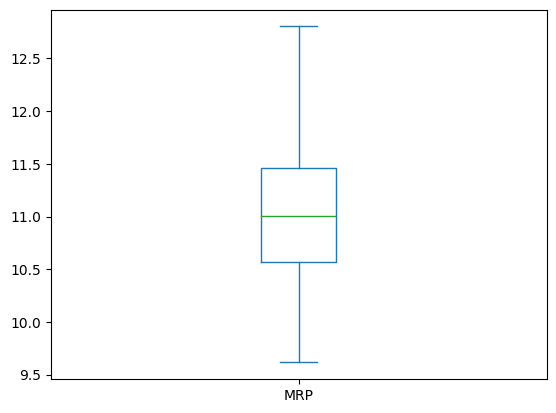

In [ ]:
df.MRP.plot(kind='box')
plt.show()

# Feature Engineering

Feature engineering is the process of transforming raw data into useful features that can be used to train machine learning models. It involves selecting and extracting relevant data features, as well as transforming and scaling them to improve model performance. Feature engineering requires domain knowledge, creativity, and analytical skills and involves techniques such as one-hot encoding, scaling, feature selection, and feature extraction. The goal is to identify and select relevant features while avoiding overfitting the model to the training data. It is a critical component of the machine learning pipeline to develop accurate and robust predictive models.


In [ ]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [ ]:
df.Product[5]

'HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop'

In [ ]:
df.Feature[463]

'Intel Core i3 Processor (10th Gen)4 GB DDR4 RAM64 bit Windows 10 Operating System1 TB HDD39.62 cm (15.6 inch) DisplaySplendid, Tru2Life, My Asus1 Year Onsite Warranty'

**Findings**

- In Product Column we can fetch Brand Name and Ram Size
- But in Feature we can fetch more Data regarding our project

 **My Observation I'm thinking to Extract all this data mention below**

 1. -  Brand Name  
 2. -  RAM Type    
 3. -  RAM Size    
 4. -  OS
 5. -  Disk Type   
 6. -  Disk Size   
 7. - Processor
 8. -  GPU
 9. -  Warranty
 10. - Screen Size

**Brand Name**

A laptop brand name refers to the name of the company that manufactures and sells laptops. There are numerous laptop brands in the market, each with its unique features, design, and price range. Popular laptop brands include Apple, Dell, HP, Lenovo, Acer, ASUS, MSI, Razer, Samsung, and LG. Each of these brands has its strengths and weaknesses, and consumers often choose a laptop brand based on their specific needs and preferences.

In [ ]:
# Splitting data into Three parts to that i can fetch brand name and others

temp1 = df['Product'].str.split('GB', n=3, expand=True)

In [ ]:
# Printing temp1 dataframe

temp1

,0,1,2,3
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8,/256,SSD/Windows 11 Home) 14ITL05 Thin and Light L...,None
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8,/512,SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN ...,None
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8,/512,SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-...,None
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8,/512,SSD/Windows 10/4,Graphics/NVIDIA GeForce ...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8,/512,SSD/Windows 11 Home/4,Graphics/NVIDIA GeForce G...
...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,/64,EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...,None
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,/512,SSD/Windows 11 Home/4,Graphic...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,/1 TB SSD/Windows 11 Home/8,Graphics/NVIDIA ...,None
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,/512,SSD/Windows 11 Home) UP5...,None


In [ ]:
temp1[0][0]

'Lenovo IdeaPad 3 Core i3 11th Gen - (8 '

In [ ]:
# Printing temp1 first column

temp1[0]

0                Lenovo IdeaPad 3 Core i3 11th Gen - (8 
1                Lenovo IdeaPad 3 Core i3 11th Gen - (8 
2         ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 
3       HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8 
4             ASUS TUF Gaming F15 Core i5 10th Gen - (8 
                             ...                        
715    ASUS Chromebook Flip Touch Celeron Dual Core -...
716    Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...
717    ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...
718    ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...
719        Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 
Name: 0, Length: 720, dtype: object

In [ ]:
# Printing temp1 second column

temp1[1]

0                             /256 
1                             /512 
2                             /512 
3                             /512 
4                             /512 
                   ...             
715                            /64 
716                           /512 
717    /1 TB SSD/Windows 11 Home/8 
718                           /512 
719                  /1 TB HDD/256 
Name: 1, Length: 720, dtype: object

In [ ]:
# Printing temp1 third column

temp1[2]

0       SSD/Windows 11 Home) 14ITL05 Thin and Light L...
1       SSD/Windows 11 Home) 82H801L7IN | 82H802FJIN ...
2       SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-...
3                                      SSD/Windows 10/4 
4                                 SSD/Windows 11 Home/4 
                             ...                        
715       EMMC Storage/Chrome OS) C214MA-BU0452 Chrom...
716                               SSD/Windows 11 Home/4 
717                                  Graphics/NVIDIA ...
718                          SSD/Windows 11 Home) UP5...
719                  SSD/Windows 10 Home) 15IIL05 Laptop
Name: 2, Length: 720, dtype: object

**Findings**

- temp1 first column well help me to extact Laptop Brand Name
- And Fetching Hard Disk size into temp second column

In [ ]:
# temp1 first column into temp1s variable

temp1s = temp1[0]

In [ ]:
 # Converting Series into Dataframe

temp1s = pd.DataFrame(temp1s)
temp1s

,0
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8
...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...


In [ ]:
# Fetching Laptop Brand Name Using Split function and Indexing

brand = temp1s[0].str.split().str[0]
brand.value_counts()

ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: 0, dtype: int64

In [ ]:
# Adding brand column into main DataFrame

df['Brand Name'] = brand
df.head()

,Product,Rating,MRP,Feature,Brand Name
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS


In [ ]:
df['Brand Name'].value_counts()

ASUS         251
Lenovo       196
HP            61
DELL          61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
realme         6
ALIENWARE      3
SAMSUNG        2
Ultimus        2
Vaio           1
GIGABYTE       1
Nokia          1
Name: Brand Name, dtype: int64

In [ ]:
# To prevent overfitting less brand values store into Others Variable

df['Brand Name'] = df['Brand Name'].str.replace('realme','Others')
df['Brand Name'] = df['Brand Name'].str.replace('SAMSUNG','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Ultimus','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Vaio','Others')
df['Brand Name'] = df['Brand Name'].str.replace('GIGABYTE','Others')
df['Brand Name'] = df['Brand Name'].str.replace('Nokia','Others')
df['Brand Name'] = df['Brand Name'].str.replace('ALIENWARE','DELL')

In [ ]:
df['Brand Name'].value_counts()

ASUS         251
Lenovo       196
DELL          64
HP            61
acer          35
RedmiBook     31
MSI           30
Infinix       20
APPLE         19
Others        13
Name: Brand Name, dtype: int64

**Finding**

- To prevent outlier less brand values store into Others Variable

In [ ]:
# Regular expression to extract the Operating System (OS) from the "Feature" column
regex_os = r'(Windows|MAC)'

# Function to extract the OS information from a string using regex
def extract_os(text):
    match = re.search(regex_os, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return "Others"

# Apply the function to the "Feature" column and create a new column with the OS information
df['OS'] = df['Feature'].apply(extract_os)
df['OS'].value_counts()

Windows    690
Mac         19
Others      11
Name: OS, dtype: int64

**Finding**

- Windows Laptops are more in compare to others
- Apple Laptops is less because of expensive
- Others maybe linux or andriod OS

In [ ]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows


**RAM Type**


In [ ]:
regex_ram_type = r'(DDR[0-9L]*|LPDDR[0-9X]*)'

def extract_ram_type(text):
    match = re.search(regex_ram_type, text, re.IGNORECASE)
    if match:
        return match.group(0)
    else:
        return None

df['Ram Type'] = df['Feature'].apply(extract_ram_type)

df['Ram Type'].value_counts()

DDR4       561
DDR5        92
LPDDR4X     37
LPDDR5       9
LPDDR4       8
LPDDR3       1
Name: Ram Type, dtype: int64

In [ ]:
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR5','Others')
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR4','Others')
df['Ram Type'] = df['Ram Type'].str.replace('LPDDR3','Others')
df['Ram Type'].value_counts()

DDR4       561
DDR5        92
OthersX     37
Others      18
Name: Ram Type, dtype: int64

In [ ]:
df['Ram Type'] = df['Ram Type'].str.replace('OthersX','Others')
df['Ram Type'].value_counts()

DDR4      561
DDR5       92
Others     55
Name: Ram Type, dtype: int64

In [ ]:
df['Ram Type'].unique()

array(['DDR4', 'DDR5', 'Others', None], dtype=object)

In [ ]:
df['Ram Type'].fillna('Others', inplace=True)

In [ ]:
df['Ram Type'].unique()

array(['DDR4', 'DDR5', 'Others'], dtype=object)

In [ ]:
df['Ram Type'].value_counts()

DDR4      561
DDR5       92
Others     67
Name: Ram Type, dtype: int64

**Findings**

- To prevent overfitting less ram type values store into Others Variable

In [ ]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4


**RAM**



In [ ]:
regex_ram = r'(\d+)\s*(?:GB|MB)(?:\s*DDR\d)?'

# Function to extract RAM information from a string using regex
def extract_ram(text):
    match = re.search(regex_ram, text, re.IGNORECASE)
    if match:
        return f"{match.group(1)}GB"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the RAM information
df['RAM'] = df['Feature'].apply(extract_ram)

# Print the count of each RAM size
df['RAM'].value_counts()

8GB      400
16GB     263
4GB       38
32GB      17
128GB      2
Name: RAM, dtype: int64

In [ ]:
df['RAM'] = df['RAM'].str.replace('8GB','8')
df['RAM'] = df['RAM'].str.replace('16GB','16')
df['RAM'] = df['RAM'].str.replace('4GB','4')
df['RAM'] = df['RAM'].str.replace('32GB','32')
df['RAM'] = df['RAM'].str.replace('128GB','32')
df['RAM'] = df['RAM'].str.replace('128','32')

In [ ]:
df['RAM'].value_counts()

8     400
16    263
4      38
32     19
Name: RAM, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float32
 3   Feature     720 non-null    object 
 4   Brand Name  720 non-null    object 
 5   OS          720 non-null    object 
 6   Ram Type    720 non-null    object 
 7   RAM         720 non-null    object 
dtypes: float32(1), float64(1), object(6)
memory usage: 42.3+ KB


In [ ]:
df['RAM'] = df['RAM'].astype('int32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float32
 3   Feature     720 non-null    object 
 4   Brand Name  720 non-null    object 
 5   OS          720 non-null    object 
 6   Ram Type    720 non-null    object 
 7   RAM         720 non-null    int32  
dtypes: float32(1), float64(1), int32(1), object(5)
memory usage: 39.5+ KB


In [ ]:
df['RAM'].value_counts()

8     400
16    263
4      38
32     19
Name: RAM, dtype: int64

In [ ]:
df['RAM'].unique()

array([ 8, 16,  4, 32], dtype=int32)

In [ ]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8


**Findings**

- 8 GB RAM Laptops are more in compare to others.
- Two laptops RAM size is 128 GB. It will affect the ML Model so I decided so merge into 32 GB RAM size.

# disk type

In [ ]:
df['Disk Type'] = df['Product'].apply(lambda x:'HDD' if 'HDD' in x else 'SSD' )
df['Disk Type'].value_counts()

SSD    672
HDD     48
Name: Disk Type, dtype: int64

In [ ]:
df['Disk Type'].unique()

array(['SSD', 'HDD'], dtype=object)

In [ ]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD


**Disk Size**


In [ ]:
temp1[1]

0                             /256 
1                             /512 
2                             /512 
3                             /512 
4                             /512 
                   ...             
715                            /64 
716                           /512 
717    /1 TB SSD/Windows 11 Home/8 
718                           /512 
719                  /1 TB HDD/256 
Name: 1, Length: 720, dtype: object

In [ ]:
DISKSIZE =  temp1[1]
DISKSIZE

0                             /256 
1                             /512 
2                             /512 
3                             /512 
4                             /512 
                   ...             
715                            /64 
716                           /512 
717    /1 TB SSD/Windows 11 Home/8 
718                           /512 
719                  /1 TB HDD/256 
Name: 1, Length: 720, dtype: object

In [ ]:
DISKSIZE.value_counts()

/512                                                                375
/256                                                                 99
/1 TB SSD/Windows 11 Home/4                                          38
/1 TB SSD/Windows 11 Hom...                                          31
/1 TB SSD/Windows 11 Home/8                                          27
/1 TB HDD/256                                                        26
/1 TB SSD/Win...                                                     25
/1 TB SSD/Windows 11 Home/6                                          11
/128                                                                  8
/64                                                                   7
/1 TB SSD/Windows 10 Home/4                                           6
/1 TB SSD/Windows 11 ...                                              6
/1 TB SSD/Windows 10 Home/6                                           5
/1 TB SSD/Windows 10 Home/8                                     

In [ ]:
DISKSIZE = DISKSIZE.str.replace('/','')

In [ ]:
DISKSIZE.value_counts()

512                                                               375
256                                                                99
1 TB SSDWindows 11 Home4                                           38
1 TB SSDWindows 11 Hom...                                          31
1 TB SSDWindows 11 Home8                                           27
1 TB HDD256                                                        26
1 TB SSDWin...                                                     25
1 TB SSDWindows 11 Home6                                           11
128                                                                 8
64                                                                  7
1 TB SSDWindows 10 Home4                                            6
1 TB SSDWindows 11 ...                                              6
1 TB SSDWindows 10 Home6                                            5
1 TB SSDWindows 10 Home8                                            4
1 TB SSDWindows 11 H

In [ ]:
DISKSIZE = DISKSIZE.str.split().str[0]
DISKSIZE = DISKSIZE.astype('int')
DISKSIZE

0      256
1      512
2      512
3      512
4      512
      ... 
715     64
716    512
717      1
718    512
719      1
Name: 1, Length: 720, dtype: int64

In [ ]:
DISKSIZE.value_counts()

512    375
1      223
256     99
128      8
64       7
2        7
32       1
Name: 1, dtype: int64

In [ ]:
df['DISK SIZE'] = DISKSIZE

In [ ]:
df['DISK SIZE'] = df['DISK SIZE'].replace(1,1024)
df['DISK SIZE'] = df['DISK SIZE'].replace(2,2048)

In [ ]:
df['DISK SIZE'].value_counts()

512     375
1024    223
256      99
128       8
64        7
2048      7
32        1
Name: DISK SIZE, dtype: int64

In [ ]:
df['DISK SIZE'] = df['DISK SIZE'].replace(32,128)
df['DISK SIZE'] = df['DISK SIZE'].replace(64,128)
df['DISK SIZE'] = df['DISK SIZE'].replace(2048,1024)
df['DISK SIZE'].value_counts()

512     375
1024    230
256      99
128      16
Name: DISK SIZE, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float32
 3   Feature     720 non-null    object 
 4   Brand Name  720 non-null    object 
 5   OS          720 non-null    object 
 6   Ram Type    720 non-null    object 
 7   RAM         720 non-null    int32  
 8   Disk Type   720 non-null    object 
 9   DISK SIZE   720 non-null    int64  
dtypes: float32(1), float64(1), int32(1), int64(1), object(6)
memory usage: 50.8+ KB


In [ ]:
df['DISK SIZE'].unique()

array([ 256,  512, 1024,  128])

In [ ]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512


**Findings**

- 512 GB Storage Size are more in compare to others.
- To prevent Outlier I merge extreme values to thers values.

**Processor**



In [ ]:
# Define regular expression pattern for processor name
regex_processor = r'(?:Intel|AMD)\s+[A-Za-z\d]+'

# Function to extract processor name from a string using regex
def extract_processor(text):
    match = re.search(regex_processor, text, re.IGNORECASE)
    if match:
        return match.group()
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the processor information
df['Processor'] = df['Feature'].apply(extract_processor)
df['Processor'].value_counts()

Intel Core       355
AMD Ryzen        307
Intel Celeron     23
Intel Pentium      5
Intel i3           3
AMD Athlon         2
Intel Evo          2
Intel PQC          1
AMD Dual           1
Intel i7           1
Name: Processor, dtype: int64

In [ ]:
# Function to extract processor brand information from a string using regex
def extract_processor_brand(text):
    if re.search(r"intel", text, re.IGNORECASE):
        return "Intel"
    elif re.search(r"amd", text, re.IGNORECASE):
        return "AMD"
    else:
        return "Others"

# Apply the function to the "Feature" column and create a new column with the processor brand information
df['Processor'] = df['Feature'].apply(extract_processor_brand)
df['Processor'].value_counts()

Intel     390
AMD       310
Others     20
Name: Processor, dtype: int64

In [ ]:
df['Processor'].unique()

array(['Intel', 'AMD', 'Others'], dtype=object)

In [ ]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel


**Findings**

- Majorly Two categories of Processor so i decided to categorize then.

**Graphical Processing Unit (GPU)**



In [ ]:
# Regular expression pattern to match GPU name and memory size
regex_gpu = r'(\bNVIDIA\b|\bAMD\b).*?(\d+)\s*GB'

# Function to extract GPU information from a string using regex
def extract_gpu(text):
    match = re.search(regex_gpu, text, re.IGNORECASE)
    if match:
        return f"{match.group(1)} {match.group(2)} GB"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the GPU information
df['GPU'] = df['Feature'].apply(extract_gpu)
df['GPU'].value_counts()

AMD 16 GB        155
AMD 8 GB         146
AMD 32 GB          4
NVIDIA 16 GB       3
NVIDIA 8 GB        2
NVIDIA 2 GB        1
AMD 4 GB           1
NVIDIA 4 GB        1
NVIDIA 32 GB       1
NVIDIA 128 GB      1
Name: GPU, dtype: int64

In [ ]:
regex_gpu = r'(NVIDIA|AMD|Intel)\s[\w\s]+\d{3,4}'

# Function to extract GPU information from a string using regex
def extract_gpu(text):
    match = re.search(regex_gpu, text, re.IGNORECASE)
    if match:
        return match.group(1)
    else:
        return 'Others'

# Apply the function to the "Feature" column and create a new column with the GPU information
df['GPU'] = df['Feature'].apply(extract_gpu)
df['GPU'].value_counts()

Others    533
AMD       156
Intel      20
NVIDIA     11
Name: GPU, dtype: int64

In [ ]:
df['GPU'].unique()

array(['Others', 'AMD', 'Intel', 'NVIDIA'], dtype=object)

In [ ]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others


**Findings**

- Majorly Laptops and Integrated Graphics.
- AMD GPU is more as compare to others.
- NVIDIA GPU is less just because of expensive.
- Intel are play majorly Integrated Graphics.

**Warranty**



In [ ]:
# Regular expression to match warranty duration
regex_warranty = r'(\d+)\s*(?:year|yr|y)(?:s)?'

# Function to extract warranty information from a string using regex
def extract_warranty(text):
    match = re.search(regex_warranty, text, re.IGNORECASE)
    if match:
        years = int(match.group(1))
        if years == 1:
            return f"{years} year warranty"
        elif years > 1:
            return f"{years} years warranty"
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the warranty information
df['Warranty'] = df['Feature'].apply(extract_warranty)
df['Warranty'].value_counts()

1 year warranty         479
2 years warranty         85
20212 years warranty     68
20211 years warranty     41
20191 years warranty     31
20193 years warranty      4
3 years warranty          4
32 years warranty         3
20192 years warranty      3
3652 years warranty       1
Name: Warranty, dtype: int64

In [ ]:
df['Warranty'] = df['Warranty'].str.replace('1 year warranty','1')
df['Warranty'] = df['Warranty'].str.replace('2 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20212 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20211 years warranty','1')
df['Warranty'] = df['Warranty'].str.replace('20191 years warranty','1')
df['Warranty'] = df['Warranty'].str.replace('20193 years warranty','3')
df['Warranty'] = df['Warranty'].str.replace('3 years warranty','3')
df['Warranty'] = df['Warranty'].str.replace('32 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('20192 years warranty','2')
df['Warranty'] = df['Warranty'].str.replace('3652 years warranty','2')

In [ ]:
df.Warranty.value_counts()

1        551
2         85
20212     68
3          8
32         3
20192      3
3652       1
Name: Warranty, dtype: int64

In [ ]:
df['Warranty'] = df['Warranty'].str.replace('20212','2')
df['Warranty'] = df['Warranty'].str.replace('32','2')
df['Warranty'] = df['Warranty'].str.replace('20192','2')
df['Warranty'] = df['Warranty'].str.replace('20212','2')
df['Warranty'] = df['Warranty'].str.replace('3652','2')

In [ ]:
df.Warranty.value_counts()

1    551
2    160
3      8
Name: Warranty, dtype: int64

In [ ]:
df['Warranty'] = df['Warranty'].str.replace('3','2')
df.Warranty.value_counts()

1    551
2    168
Name: Warranty, dtype: int64

In [ ]:
df.Warranty.unique()

array(['2', '1', None], dtype=object)

In [ ]:
df.Warranty.fillna('2',inplace=True)

In [ ]:
df.Warranty.value_counts()

1    551
2    169
Name: Warranty, dtype: int64

In [ ]:
df.Warranty.unique()

array(['2', '1'], dtype=object)

In [ ]:
df['Warranty'] = df['Warranty'].astype('int32')

In [ ]:
df.Warranty.value_counts()

1    551
2    169
Name: Warranty, dtype: int64

In [ ]:
df.Warranty.unique()

array([2, 1], dtype=int32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float32
 3   Feature     720 non-null    object 
 4   Brand Name  720 non-null    object 
 5   OS          720 non-null    object 
 6   Ram Type    720 non-null    object 
 7   RAM         720 non-null    int32  
 8   Disk Type   720 non-null    object 
 9   DISK SIZE   720 non-null    int64  
 10  Processor   720 non-null    object 
 11  GPU         720 non-null    object 
 12  Warranty    720 non-null    int32  
dtypes: float32(1), float64(1), int32(2), int64(1), object(8)
memory usage: 64.8+ KB


In [ ]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,2
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,2
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1


**Findings**

- Majorly Laptops comes 1 Year of warranty
- 3 Year Warranty Laptops are only 8 so I decided to marge into 2 Year Warranty Laptops just because of preventy Outlier.

**Screen Size**


In [ ]:
# Regular expression to match screen sizes

regex = r'(\d+(?:\.\d+)?)(?:\s*inch|"|\'\')'

# Function to extract screen sizes from a string using regex

def extract_screen_size(text):
    match = re.search(regex, text)
    if match:
        return float(match.group(1))
    else:
        return None

# Apply the function to the "Feature" column and create a new column with the screen sizes

df['ScreenSize'] = df['Feature'].apply(extract_screen_size)

In [ ]:
df.ScreenSize.value_counts()

15.6        362
14.0        103
13.3          9
16.0          6
16.1          5
16.2          5
17.3          5
14.1          4
11.6          4
15.0          4
14.2          2
13.0          1
13.5          1
16.6          1
206015.6      1
Name: ScreenSize, dtype: int64

In [ ]:
df['ScreenSize'] = df['ScreenSize'].astype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     720 non-null    object 
 1   Rating      581 non-null    float64
 2   MRP         720 non-null    float32
 3   Feature     720 non-null    object 
 4   Brand Name  720 non-null    object 
 5   OS          720 non-null    object 
 6   Ram Type    720 non-null    object 
 7   RAM         720 non-null    int32  
 8   Disk Type   720 non-null    object 
 9   DISK SIZE   720 non-null    int64  
 10  Processor   720 non-null    object 
 11  GPU         720 non-null    object 
 12  Warranty    720 non-null    int32  
 13  ScreenSize  513 non-null    float64
dtypes: float32(1), float64(2), int32(2), int64(1), object(8)
memory usage: 70.4+ KB


In [ ]:
df['ScreenSize'] = df['ScreenSize'].replace(16.0, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(13.3, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(16.1, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(16.2, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(17.3, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(14.1, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(11.6, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(15.0, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(14.2, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(13.0, 14.0)
df['ScreenSize'] = df['ScreenSize'].replace(16.6, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(206015.6, 15.6)
df['ScreenSize'] = df['ScreenSize'].replace(13.5, 14.0)

In [ ]:
df['ScreenSize'].value_counts()

15.6    389
14.0    124
Name: ScreenSize, dtype: int64

In [ ]:
df['ScreenSize'].sample(5)

503    15.6
12     15.6
497    15.6
535    14.0
636     NaN
Name: ScreenSize, dtype: float64

In [ ]:
df['ScreenSize'].unique()

array([14. , 15.6,  nan])

In [ ]:
df['ScreenSize'].mean()

15.213255360623782

In [ ]:
df['ScreenSize'].fillna(15.6, inplace=True)

In [ ]:
df['ScreenSize'].unique()

array([14. , 15.6])

In [ ]:
df['ScreenSize'].value_counts()

15.6    596
14.0    124
Name: ScreenSize, dtype: int64

In [ ]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,2,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,2,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6


**Findings**

- 15.6 Inches laptops are more in compare to others
- In Screensize Column are they too many extreme value so I decided to cap into 14.0 and 15.6 Inches

In [ ]:
df['GPU'].value_counts()

Others    533
AMD       156
Intel      20
NVIDIA     11
Name: GPU, dtype: int64

In [ ]:
df['GPU'].unique()

array(['Others', 'AMD', 'Intel', 'NVIDIA'], dtype=object)

In [ ]:
df.head()

,Product,Rating,MRP,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,2,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,2,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6


In [ ]:
df = df.rename(columns={'MRP': 'Price'})

In [ ]:
df.head()

,Product,Rating,Price,Feature,Brand Name,OS,Ram Type,RAM,Disk Type,DISK SIZE,Processor,GPU,Warranty,ScreenSize
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,10.518430,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,256,Intel,Others,2,14.0
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,10.596410,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Lenovo,Windows,DDR4,8,SSD,512,Intel,Others,2,15.6
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,10.403990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,10.819598,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,HP,Windows,DDR4,8,SSD,512,AMD,AMD,1,15.6
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,10.819598,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,ASUS,Windows,DDR4,8,SSD,512,Intel,Others,1,15.6


In [ ]:
# Reassigning the columns

df = df[['Brand Name','OS','Ram Type','RAM','Processor','GPU','Warranty','ScreenSize','Disk Type','DISK SIZE', 'Price']]

In [ ]:
df.head()

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE,Price
0,Lenovo,Windows,DDR4,8,Intel,Others,2,14.0,SSD,256,10.518430
1,Lenovo,Windows,DDR4,8,Intel,Others,2,15.6,SSD,512,10.596410
2,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,10.403990
3,HP,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512,10.819598
4,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,10.819598


**Noted :**

Price Column are applied by Log Transformation

In [ ]:
df.to_csv("cleaned.csv")

# Data Visualization


In [ ]:
# Converting Price Column into normal using exponential

price = df['Price']

df['Price'] = np.exp(price)

In [ ]:
df['Price'] = df['Price'].astype('int')

df['Price'].value_counts()

39991     61
36990     39
85990     34
38706     30
196990    30
          ..
301991     1
37001      1
42690      1
140990     1
23491      1
Name: Price, Length: 250, dtype: int64

In [ ]:
df.to_csv("cleaned1.csv")

In [ ]:
df.head()

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE,Price
0,Lenovo,Windows,DDR4,8,Intel,Others,2,14.0,SSD,256,36990
1,Lenovo,Windows,DDR4,8,Intel,Others,2,15.6,SSD,512,39991
2,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,32990
3,HP,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512,49990
4,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,49990


## Univariate Analysis

Univariate analysis is a statistical technique used to examine and summarize a single variable at a time. It involves analyzing the distribution, central tendency, and variability of the variable through measures such as frequency distribution, measures of central tendency, measures of dispersion, histograms, and box plots. Univariate analysis is an essential step in data analysis, providing a basic understanding of the data before proceeding to more complex multivariate analyses.

**Brand Name**

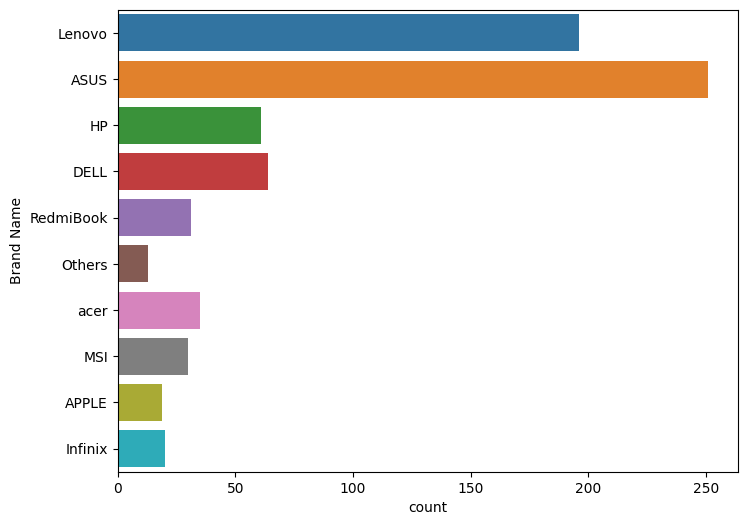

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y=df['Brand Name'], orient='h')
plt.show()

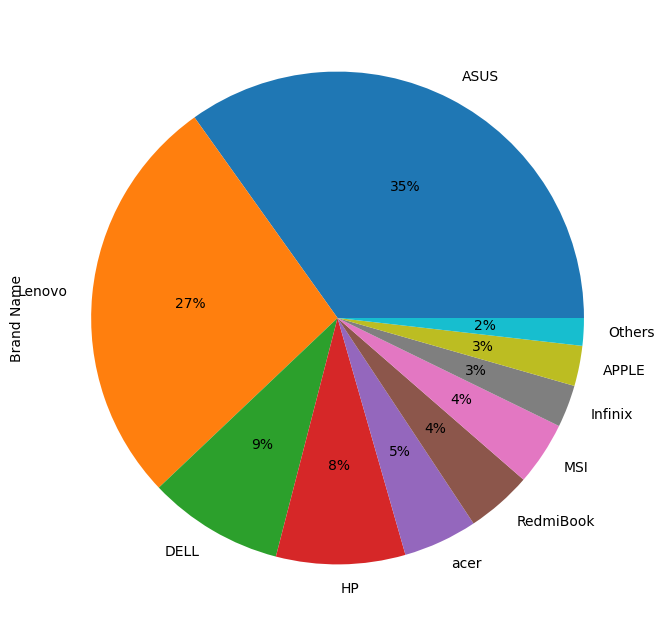

In [ ]:
df['Brand Name'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Operating System (OS)**

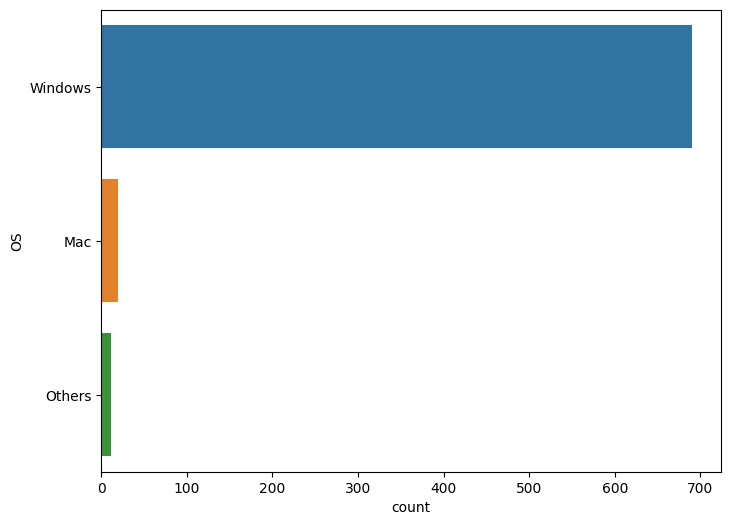

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(y=df['OS'], orient='h')
plt.show()

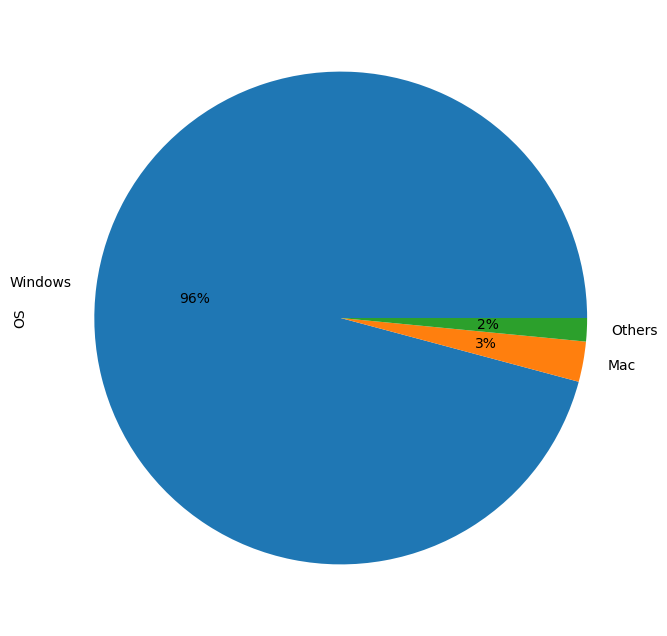

In [ ]:
df['OS'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Ram Type**

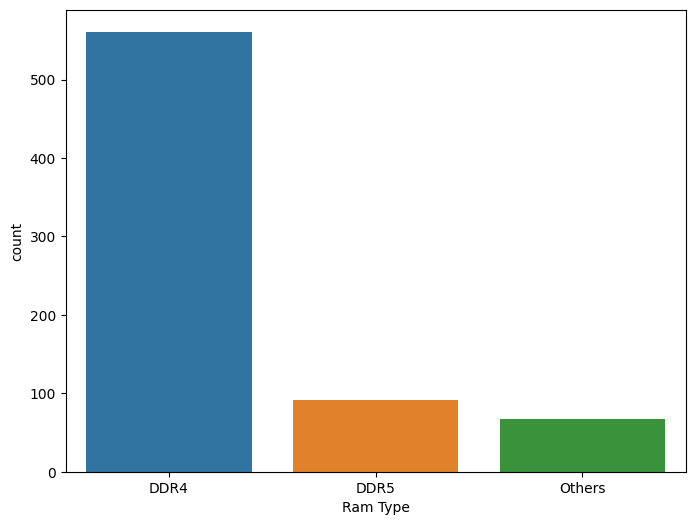

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Ram Type'])
plt.show()

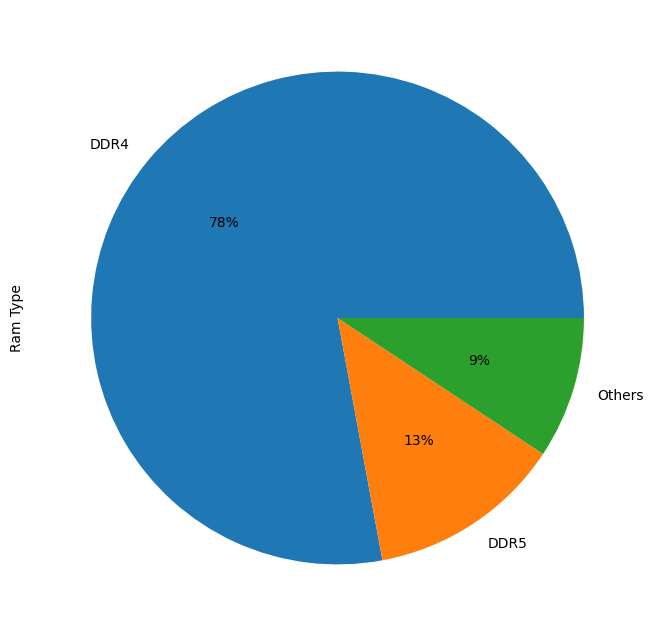

In [ ]:
df['Ram Type'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**RAM**

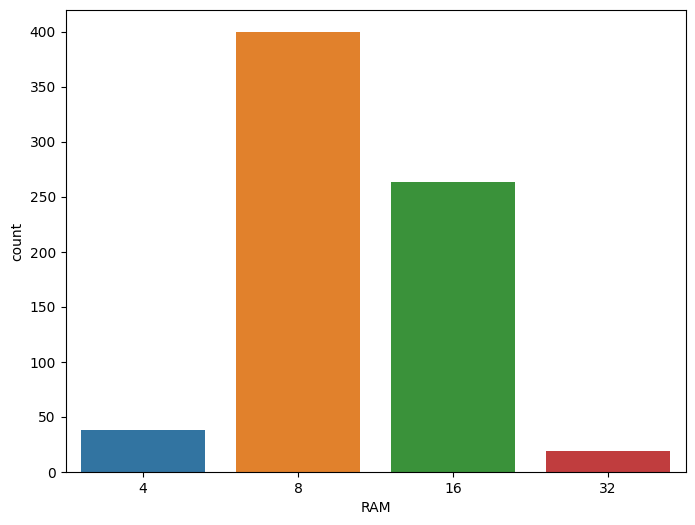

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['RAM'])
plt.show()

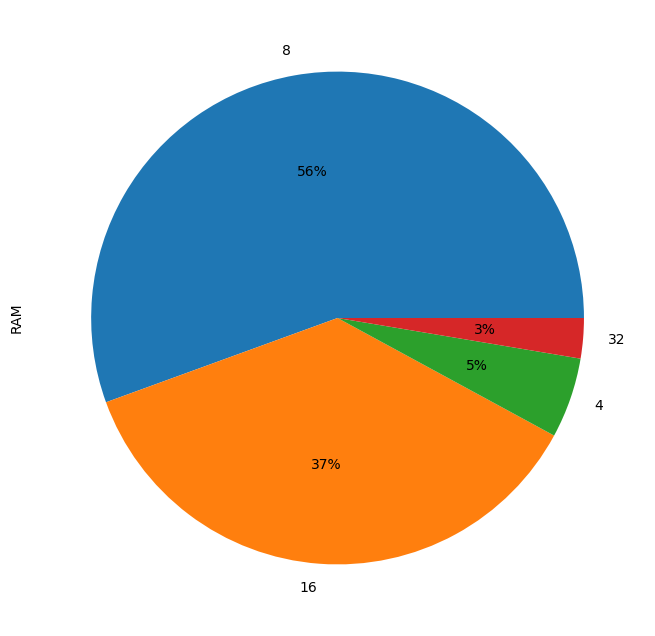

In [ ]:
df['RAM'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Processor**

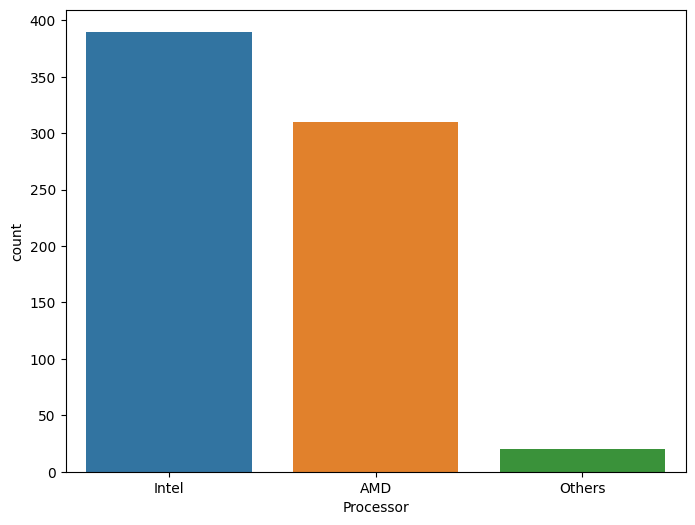

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Processor'])
plt.show()

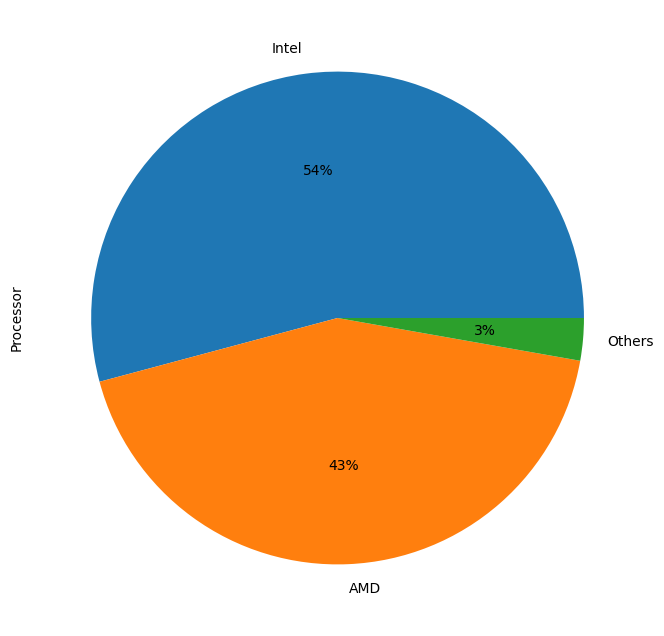

In [ ]:
df['Processor'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Graphics Processing Unit (GPU)**

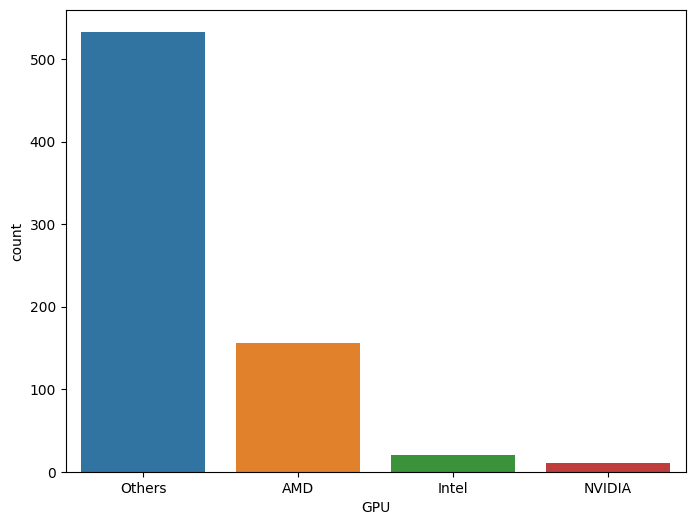

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['GPU'])
plt.show()

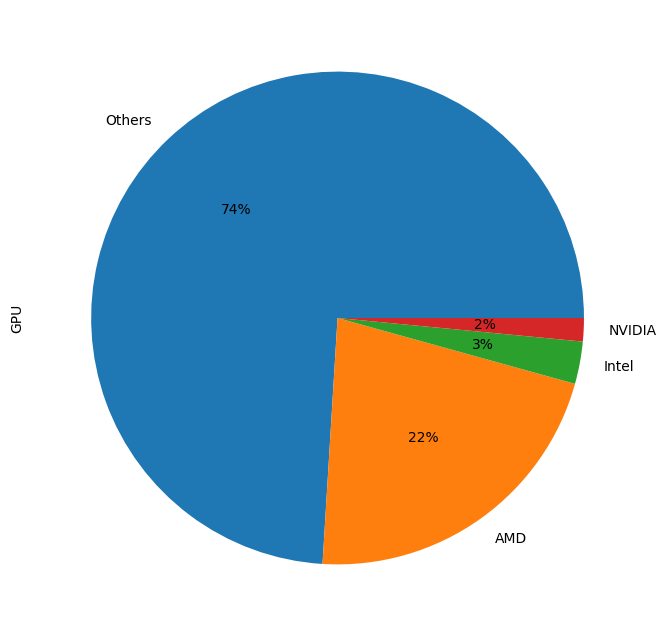

In [ ]:
df['GPU'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Warranty**

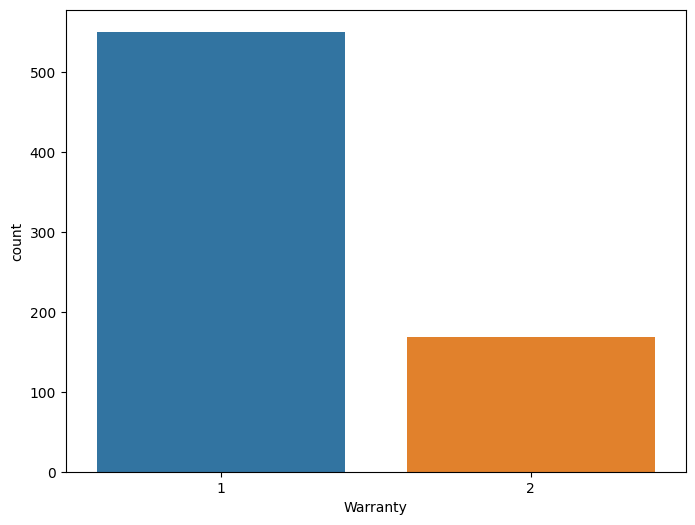

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Warranty'])
plt.show()

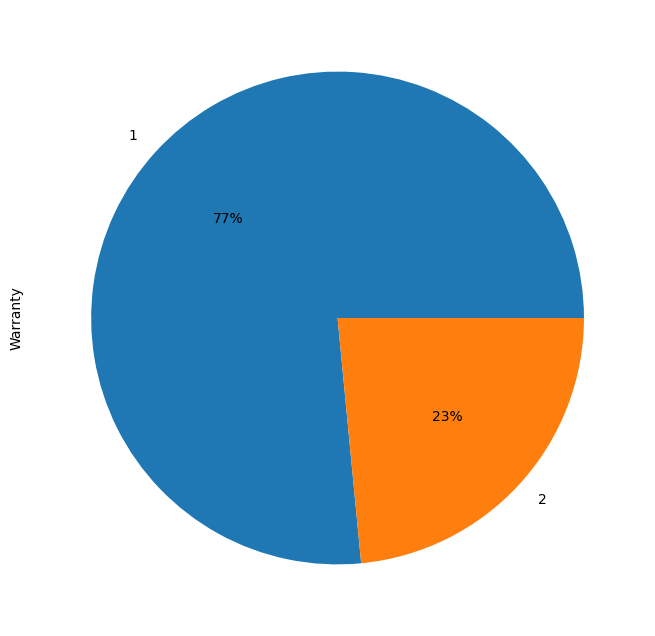

In [ ]:
df['Warranty'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Screen Size**

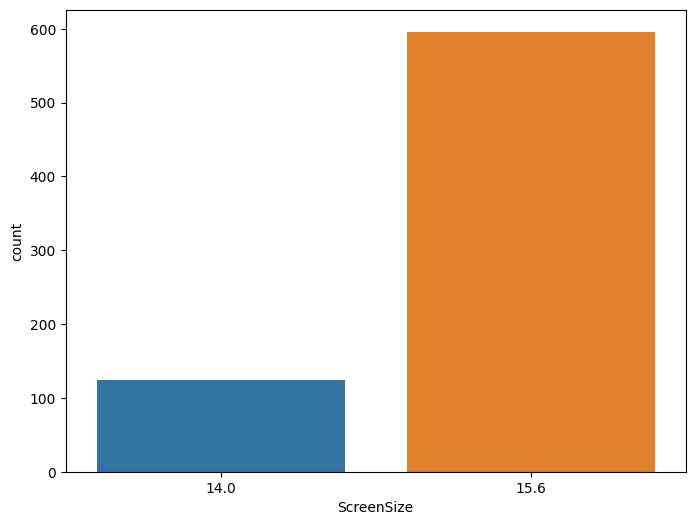

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['ScreenSize'])
plt.show()

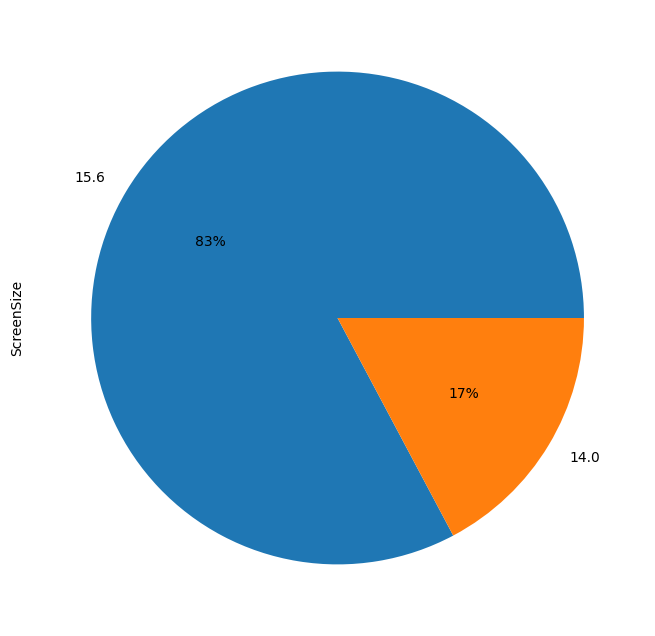

In [ ]:
df['ScreenSize'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Disk Type**

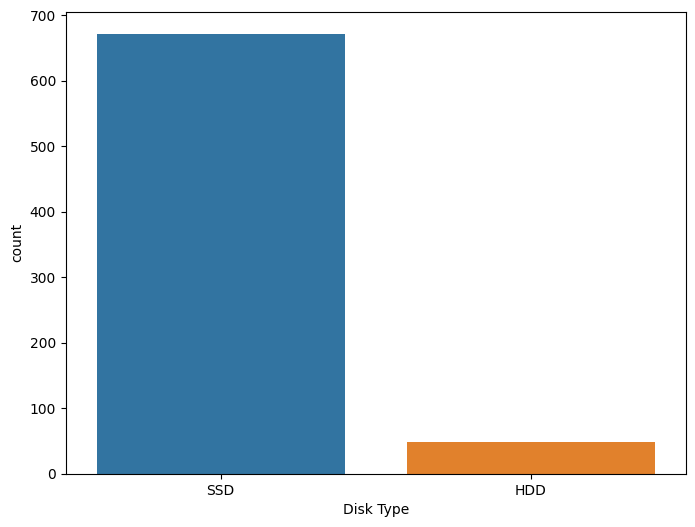

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Disk Type'])
plt.show()

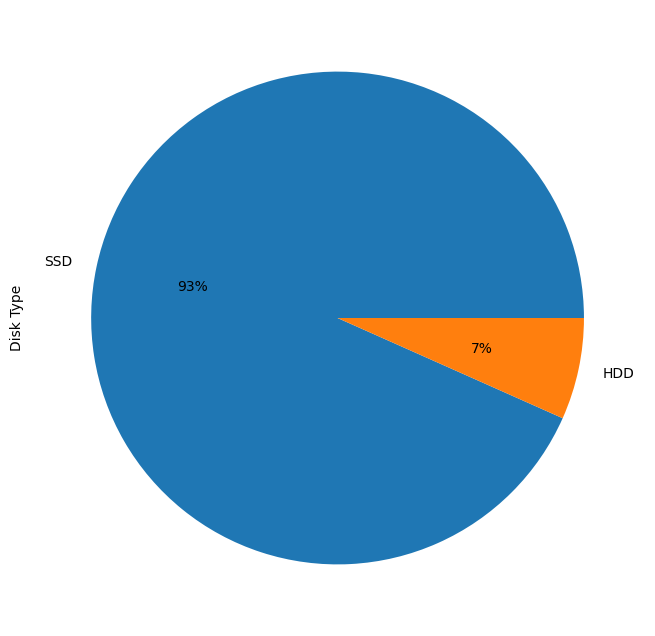

In [ ]:
df['Disk Type'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**DISK SIZE**

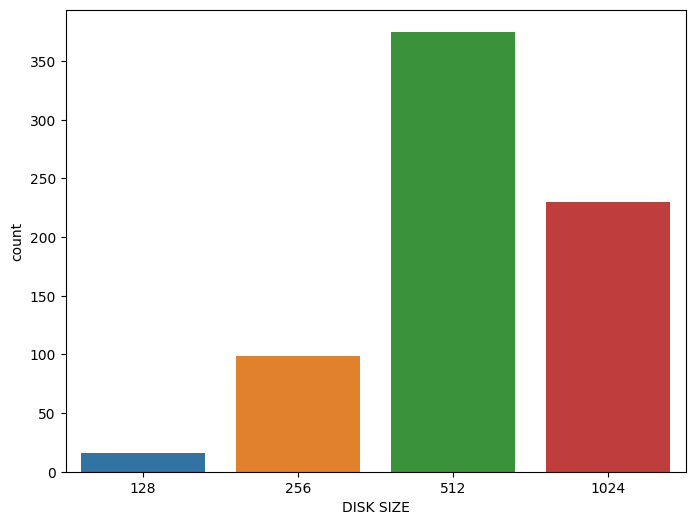

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['DISK SIZE'])
plt.show()

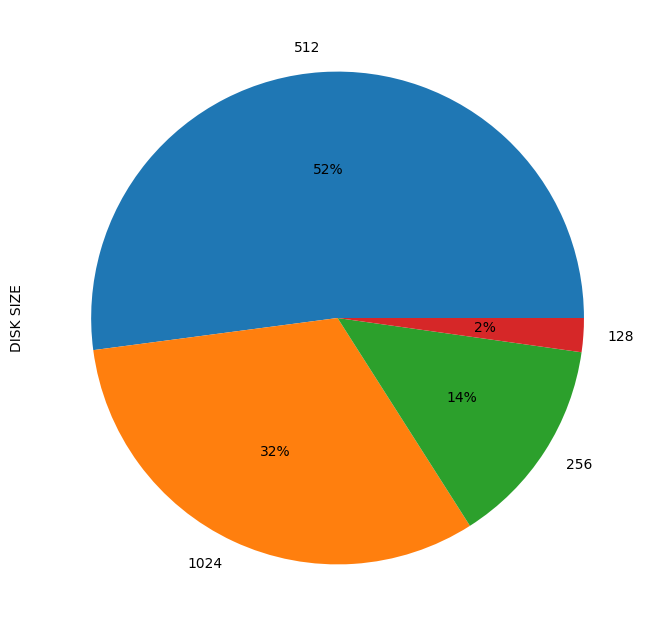

In [ ]:
df['DISK SIZE'].value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(8,8))
plt.show()

**Price**

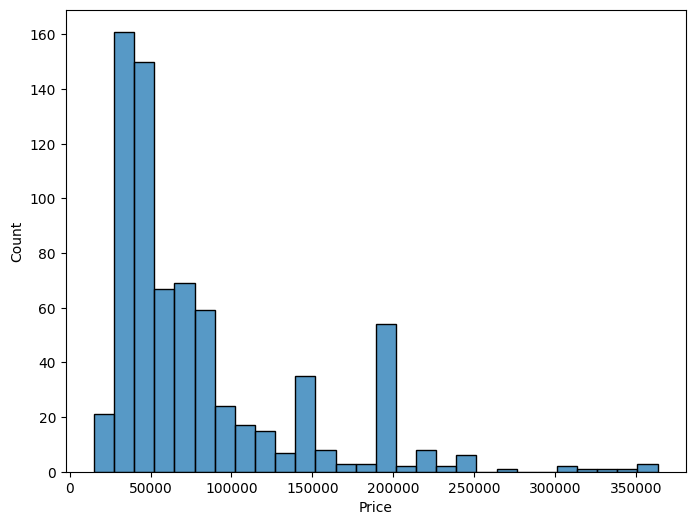

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x=df['Price'])
plt.show()

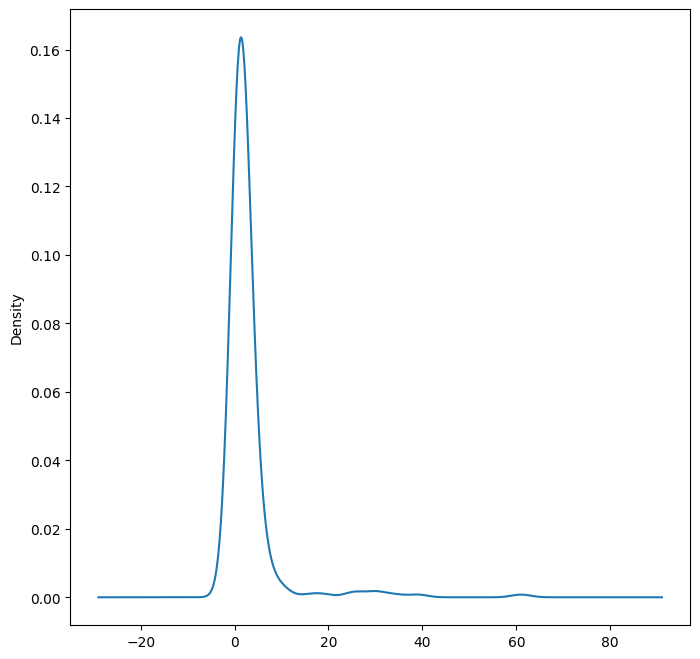

In [ ]:
df['Price'].value_counts().plot(kind='kde', figsize=(8,8))
plt.show()

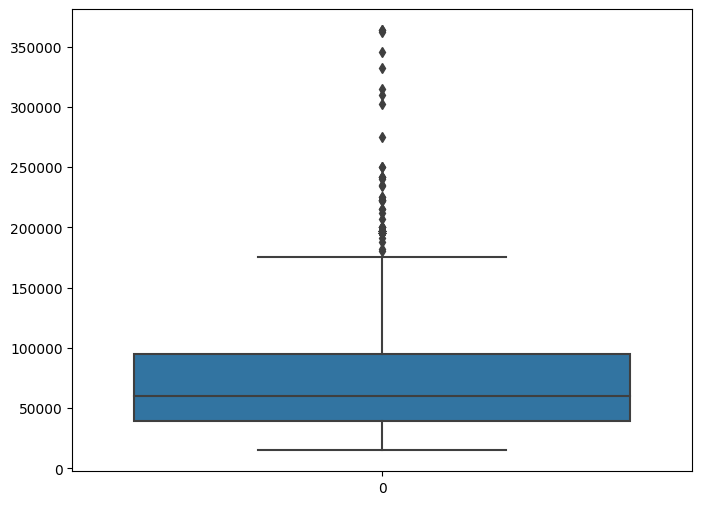

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(df['Price'])
plt.show()

## Findings


**Brand Name**

- Asus lead the laptop market and the second lead is Lenovo.
- The Market Share of Asus is 35% and lenovo is 37%.
- Dell, HP and Acer are holding 22% of Market share.
- Some Laptop Market share is less because its only target premium gaming market.
- Apple Market share is 3%. Maybe of expensive.


**Operating System (OS)**

- As always windows operating system are leading in the market
- Apple market share is second. and others maybe linux or Andriod OS.
- Windows OS is holding 96% of Market share.
- Apple Market share is 3%. Maybe of expensive.
- Others OS like linux and andriod maybe more are also holding 3% Market Share.


**Ram Type**

- DDR4 Ram is leading the market.
- DDR5 Ram is second lead just because of recently launch or expensive.
- DDR4 Ram is holding 78% of Market share.
- DDR5 Ram also becoming quiet popular and holding market share is 13%.
- Others Ram like DDR4x, DDR5x and LPDDR5 are also holding 8% of Market share.


**RAM**

- 8 GB Ram are leading the market.
- second most popular is 16 GB Ram.
- 56% of Market share holding by 8 GB Ram just because of base variant of laptop come with 8GB of Ram Size.
- 16 Ram Market share is 37% it also quiet popular.
- Some low cost Laptop comes with 4 GB of Ram and Premium Gaming Laptop comes with 32 GB of Ram Size.


**Processor**

- Intel is still leading the Laptop Market.
- Second lead of the Laptop market is AMD.
- Others comes with Snapdragon processor.
- Intel Processor Market share is 54 %.
- AMD Processor Market share is 43%.


**Graphics Processing Unit (GPU)**

- AMD is leading the GPU market
- NVIDIA is also lead the GPU market
- Others is Top lead of the GPU Market just because its less costly and its Integrated GPUs.
- AMD GPU Market share is 22% just because its less expensive compare to NVIDIA.
- NVIDIA Market share is 2% because its expensiveness.


**Warranty**

- Majorly Laptop Companies provide only 1 year of Warranty.
- Premium Laptop provide 2 years of Warranty.
- Apple Laptop also comes from 2 years Warranty.
- Also if we pay more Laptop Warranty comes with 2 or more years of Warranty.
- 77% of Laptop Market share hold by 1st year Warranty rest others.


**Screen Size**

- 15.6 Inches of Screen Size of Laptop lead the Market.
- 14.0 Inches of Screen Size of Laptop Second lead the Market.
- 83% of Laptop Market share hold by 15.6 Inches Screen size.
- 17% of Laptop Market share hold by 15.6 Inches Screen size.
- Others Screen size like 13.0, 15.0 and 17.0 and etc also Laptops comes.


**Disk Type**

- SSD Disk Type lead the Laptop Market.
- HDD Disk Type is a second lead of Laptop Market.
- 93% of Laptop Market share is hold by SSD Disk type.
- 7% of Laptop Market share is hold by HDD Disk type.
- HDD Disk type is lossing the market because its low speed.


**Disk Size**

- 512 GB of Disk Size is leading the Laptop Market.
- 1024 GB of Disk Size is second lead of the Laptop Market.
- Others like also 256 GB and 128 GB is holding the Laptop Market share.
- 52% of Laptop Market share is hold by 512 GB.
- 32% of Laptop Market share is hold by 1024 GB.


**Price**

- Mid Range of Laptop is holding More Market share.
- Premium Range of Laptop Market share is Less just because of its expensive.

## Bivariate Analysis

Bivariate analysis is a statistical technique used to analyze the relationship between two variables. It involves examining the distribution of each variable and the relationship between the two variables. Common techniques used in bivariate analysis include scatter plots, correlation analysis, t-tests, and chi-squared tests. Bivariate analysis is useful for exploring relationships among variables and is often the first step in statistical analysis.

**Brand Name VS Price**

In [ ]:
fig = px.histogram(df, x="Brand Name", y="Price")
fig.show()

- Price depend on Companies premium laptops

**RAM Type VS RAM**

In [ ]:
fig = px.histogram(df, x="Ram Type", y="RAM")
fig.show()

- DDR4 RAM Type Lead the Market

**RAM VS Price**

In [ ]:
fig = px.box(df, x="RAM", y="Price", points="all")
fig.show()

- RAM Size increase also Price increase.

**Warranty VS Price**

In [ ]:
fig = px.violin(df, x="Warranty", y="Price")
fig.show()

- Warranty depends on Laptop Prices

**Disk Type VS Price**

In [ ]:
fig = px.box(df, x="Disk Type", y="Price", points="all")
fig.show()

- SSD are more expensive than HDD

**Disk Size VS Price**

In [ ]:
fig = px.violin(df, x="DISK SIZE", y="Price")
fig.show()

- RAM Size depends on Laptops Price

**Operating System (OS) VS Price**

In [ ]:
fig = px.box(df, x="OS", y="Price", points="all")
fig.show()

- MAC OS Laptops are more expensive than others.

**Screen Size VS Price**

In [ ]:
fig = px.violin(df, x="ScreenSize", y="Price", points="all")
fig.show()

- Screen Size depends on Prices

**Graphics Processing Units (GPU) VS Price**

In [ ]:
fig = px.violin(df, x="GPU", y="Price", points="all")
fig.show()

- NVIDIA GPUs are Expensive than others

**Processor VS Price**

In [ ]:
fig = px.box(df, x="Processor", y="Price")
fig.show()

- Intel Processor are more expensives than others

## Multivariate Analysis

Multivariate analysis is a statistical technique used to analyze data involving multiple variables, which helps researchers to identify relationships, patterns, and trends among the variables. Some common types of multivariate analyses include multiple regression analysis, principal component analysis, factor analysis, cluster analysis, and discriminant analysis. Multivariate analysis is useful in many fields and can provide insights into complex relationships among variables, improving decision-making and identifying important variables.

**RAM VS Price VS Warranty**

In [ ]:
fig = px.scatter_3d(df, x="RAM", y="Price", z='Warranty',color='Brand Name')
fig.show()

- Warranty and RAM Increase also Laptop Price is Increase.

**Disk Size VS Screen size VS Price**

In [ ]:
fig = px.scatter_3d(df, x="DISK SIZE", y="Price", z='ScreenSize',color='Brand Name')
fig.show()

- Disk Size and Screen size Increase also Laptop Price is Increase

# Model Building

In summary, the steps involved in building a machine learning model include data preparation, splitting the data into training, validation, and test sets, choosing an appropriate model, training the model on the training data, evaluating the model on the validation and test sets, fine-tuning the model based on the evaluation results, and finally deploying the model for making predictions on new data.

In [ ]:
df.head()

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE,Price
0,Lenovo,Windows,DDR4,8,Intel,Others,2,14.0,SSD,256,36990
1,Lenovo,Windows,DDR4,8,Intel,Others,2,15.6,SSD,512,39991
2,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,32990
3,HP,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512,49990
4,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512,49990


In [ ]:
X = df.iloc[:,:-1]

In [ ]:
X

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE
0,Lenovo,Windows,DDR4,8,Intel,Others,2,14.0,SSD,256
1,Lenovo,Windows,DDR4,8,Intel,Others,2,15.6,SSD,512
2,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512
3,HP,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512
4,ASUS,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512
...,...,...,...,...,...,...,...,...,...,...
715,ASUS,Others,Others,4,Intel,Others,1,14.0,SSD,128
716,Lenovo,Windows,DDR4,8,AMD,AMD,1,15.6,SSD,512
717,ASUS,Windows,DDR5,16,AMD,Others,1,15.6,SSD,1024
718,ASUS,Windows,Others,16,Intel,Others,1,14.0,SSD,512


In [ ]:
y = df.iloc[:,-1]

In [ ]:
y

0       36990
1       39991
2       32990
3       49990
4       49990
        ...  
715     23491
716     73490
717    194991
718    125991
719     50990
Name: Price, Length: 720, dtype: int64

In [ ]:
y = np.log1p(y)

In [ ]:
y

0      10.518430
1      10.596435
2      10.403990
3      10.819598
4      10.819598
         ...    
715    10.064415
716    11.204918
717    12.180714
718    11.743974
719    10.839404
Name: Price, Length: 720, dtype: float64

## Train Test Split


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)

In [ ]:
X_train.head()

,Brand Name,OS,Ram Type,RAM,Processor,GPU,Warranty,ScreenSize,Disk Type,DISK SIZE
135,Lenovo,Windows,DDR4,8,AMD,AMD,2,15.6,SSD,512
548,HP,Windows,DDR5,32,Intel,Others,1,15.6,SSD,1024
235,ASUS,Windows,DDR4,8,Intel,Intel,1,15.6,SSD,256
39,ASUS,Windows,DDR4,16,Intel,Others,1,15.6,SSD,512
554,HP,Windows,DDR4,8,Intel,Others,1,15.6,SSD,512


In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics

## Linear Regression




In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming your data is loaded into X and y
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
], remainder='passthrough')

# Apply column transformer to training and test data
X_train_transformed = step1.fit_transform(X_train)
X_test_transformed = step1.transform(X_test)

# Define the linear regression model
linear_reg = LinearRegression()

# Fit the linear regression model using the transformed features
linear_reg.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = linear_reg.predict(X_test_transformed)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))



R2 score: 0.8724881461291626
MAE: 0.16973673298821115


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2),

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8612644118380742
MAE 0.17032832899473893


## Ridge Regression



In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8143537965013152
MAE 0.19572030512153443


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming your data is loaded into X and y
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
], remainder='passthrough')

# Apply column transformer to training and test data
X_train_transformed = step1.fit_transform(X_train)
X_test_transformed = step1.transform(X_test)

# Define the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the Ridge Regression model using the transformed features
ridge_reg.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = ridge_reg.predict(X_test_transformed)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8713114411038156
MAE: 0.17180183631640333


## Lasso Regression




In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8599151023636292
MAE 0.17345759739507915


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming your data is loaded into X and y
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
], remainder='passthrough')

# Apply column transformer to training and test data
X_train_transformed = step1.fit_transform(X_train)
X_test_transformed = step1.transform(X_test)

# Define the Lasso Regression model
lasso_reg = Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed

# Fit the Lasso Regression model using the transformed features
lasso_reg.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = lasso_reg.predict(X_test_transformed)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: -0.010428506450442354
MAE: 0.5183528550037936


## Random Forest




In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=155,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe2 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe2.fit(X_train,y_train)

y_pred = pipe2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8692732679669073
MAE 0.15436304726218417


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming your data is loaded into X and y
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
], remainder='passthrough')

# Apply column transformer to training data
X_train_transformed = step1.fit_transform(X_train)

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'max_samples': [0.4, 0.5, 0.6],
    'max_features': [0.7, 0.75, 0.8]
}

# Create a RandomForestRegressor instance
rf = RandomForestRegressor(random_state=3)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Perform grid search on transformed training data
grid_search.fit(X_train_transformed, y_train)

# Get the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Apply column transformer to test data
X_test_transformed = step1.transform(X_test)

# Make predictions on the test data
y_pred = best_rf.predict(X_test_transformed)

# Evaluate the model
print('Best Parameters:', grid_search.best_params_)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 10, 'max_features': 0.8, 'max_samples': 0.6, 'n_estimators': 200}
R2 score: 0.8726324695053399
MAE: 0.16577302984159126


## SVM (Support Vector Machine)


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8601414865018161
MAE 0.1748898277231622


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Assuming your data is loaded into X and y
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
], remainder='passthrough')

# Apply column transformer to training and test data
X_train_transformed = step1.fit_transform(X_train)
X_test_transformed = step1.transform(X_test)

# Select top k features using SelectKBest with f_regression scoring
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train_transformed, y_train)
X_test_selected = selector.transform(X_test_transformed)

# Define the SVR model
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

# Fit the SVR model using the transformed and selected features
step2.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = step2.predict(X_test_selected)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8601413546651886
MAE: 0.17489012194677567


## Decision Tree




In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.854275982506321
MAE 0.17058020062969112


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Assuming your data is loaded into X and y
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
], remainder='passthrough')

# Apply column transformer to training data
X_train_transformed = step1.fit_transform(X_train)

# Define the parameter grid for Decision Tree
param_grid = {
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a DecisionTreeRegressor instance
dt = DecisionTreeRegressor(random_state=3)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid,
                           scoring='r2', cv=5, verbose=1, n_jobs=-1)

# Perform grid search on transformed training data
grid_search.fit(X_train_transformed, y_train)

# Get the best estimator from the grid search
best_dt = grid_search.best_estimator_

# Apply column transformer to test data
X_test_transformed = step1.transform(X_test)

# Make predictions on the test data
y_pred = best_dt.predict(X_test_transformed)

# Evaluate the model
print('Best Parameters:', grid_search.best_params_)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}
R2 score: 0.8301005542253719
MAE: 0.18446940938856618


## KNN


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8069227496243334
MAE 0.18971372684902285


In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression

# Assuming your data is loaded into X and y
# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
], remainder='passthrough')

# Apply column transformer to training and test data
X_train_transformed = step1.fit_transform(X_train)
X_test_transformed = step1.transform(X_test)

# Select top k features using SelectKBest with f_regression scoring
selector = SelectKBest(score_func=f_regression, k='all')
X_train_selected = selector.fit_transform(X_train_transformed, y_train)
X_test_selected = selector.transform(X_test_transformed)

# Define the KNeighborsRegressor model
step2 = KNeighborsRegressor(n_neighbors=3)

# Fit the KNeighborsRegressor model using the transformed and selected features
step2.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = step2.predict(X_test_selected)

# Evaluate the model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8069223881693589
MAE: 0.18971402107672647


## Gradient Boost


In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8866688201156331
MAE 0.1537473368367408


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming your data is loaded into X and y
# Split the data into train and test sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
], remainder='passthrough')

# Apply column transformer to training and test data
X_train_transformed = step1.fit_transform(X_train)
X_test_transformed = step1.transform(X_test)

# Define the Gradient Boosting Regressor with best parameters
gb_reg = GradientBoostingRegressor(
    n_estimators=100,  # You can adjust the number of estimators
    learning_rate=0.1,  # You can adjust the learning rate
    max_depth=best_dt.max_depth,  # Using the best max_depth obtained from the grid search
    min_samples_split=best_dt.min_samples_split,  # Using the best min_samples_split obtained from the grid search
    min_samples_leaf=best_dt.min_samples_leaf,  # Using the best min_samples_leaf obtained from the grid search
    random_state=3
)

# Fit the Gradient Boosting Regressor using the transformed features
gb_reg.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = gb_reg.predict(X_test_transformed)

# Evaluate the Gradient Boosting Regressor model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8390066999308426
MAE: 0.17867646541655036


# XGBoost




In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first', handle_unknown='ignore'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe1 = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe1.fit(X_train,y_train)

y_pred = pipe1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8661659651418907
MAE 0.16466496302436592


In [ ]:
from xgboost import XGBRegressor

# Assuming your data is loaded into X and y
# Split the data into train and test sets (if not already done)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the column transformer
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
], remainder='passthrough')

# Apply column transformer to training and test data
X_train_transformed = step1.fit_transform(X_train)
X_test_transformed = step1.transform(X_test)

# Define the XGBoost Regressor with best parameters
xgb_reg = XGBRegressor(
    n_estimators=100,  # You can adjust the number of estimators
    learning_rate=0.1,  # You can adjust the learning rate
    max_depth=best_dt.max_depth,  # Using the best max_depth obtained from the grid search
    min_child_weight=best_dt.min_samples_split,  # Using the best min_samples_split obtained from the grid search
    reg_alpha=best_dt.min_samples_leaf,  # Using the best min_samples_leaf obtained from the grid search
    random_state=3
)

# Fit the XGBoost Regressor using the transformed features
xgb_reg.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = xgb_reg.predict(X_test_transformed)

# Evaluate the XGBoost Regressor model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))



R2 score: 0.8660252823514412
MAE: 0.1713697532862924


## AdaBoost




In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,3,4,5,6,7,8,9])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7708033696366112
MAE 0.25720948704629343


In [ ]:
# Apply column transformer to training and test data
X_train_transformed = step1.fit_transform(X_train)
X_test_transformed = step1.transform(X_test)

# Define the AdaBoost Regressor with best parameters
adaboost_reg = AdaBoostRegressor(
    base_estimator=best_dt,  # Using the best Decision Tree Regressor obtained from the grid search
    n_estimators=50,  # You can adjust the number of estimators
    learning_rate=0.1,  # You can adjust the learning rate
    random_state=3
)

# Fit the AdaBoost Regressor using the transformed features
adaboost_reg.fit(X_train_transformed, y_train)

# Make predictions on the test data
y_pred = adaboost_reg.predict(X_test_transformed)

# Evaluate the AdaBoost Regressor model
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.861381123510532
MAE: 0.17199407580013004


## Pickle



In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(best_rf, open('random_forest_model.pkl', 'wb'))
